In [140]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# TensorFlow / Keras functions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score,\
    recall_score, precision_score, roc_curve, roc_auc_score
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

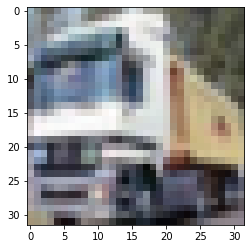

In [105]:
plt.imshow(X_train[1], plt.cm.binary)

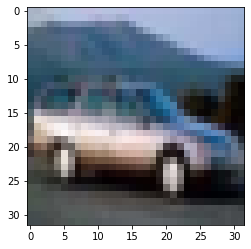

In [59]:
plt.imshow(X_train[4], plt.cm.binary)

In [106]:
print(y_train[1])
print(y_train[4])

[9]
[1]


In [146]:
car_truck_train = np.where((y_train == 1) | (y_train == 9))[0]
car_truck_test = np.where((y_test == 1) | (y_test == 9))[0]

Xtrain = X_train[car_truck_train]
ytrain = y_train[car_truck_train]

Xtest = X_test[car_truck_test]
ytest = y_test[car_truck_test]

ytrain[ytrain == 1] = False
ytrain[ytrain == 9] = True

ytest[ytest == 1] = False
ytest[ytest == 9] = True

Xtrain, Xvalid, ytrain, yvalid = train_test_split(Xtrain, ytrain, test_size=.5, stratify=ytrain, random_state=1)

print(Xtrain.shape, Xvalid.shape, Xtest.shape, ytrain.shape, yvalid.shape, ytest.shape)
print(ytest)

(5000, 32, 32, 3) (5000, 32, 32, 3) (2000, 32, 32, 3) (5000, 1) (5000, 1) (2000, 1)
[[0]
 [0]
 [1]
 ...
 [1]
 [0]
 [0]]


In [147]:
model1 = Sequential()
model1.add(Conv2D(16, kernel_size=(3,3), activation='relu',
                 padding='same', input_shape=(32,32,3)))
model1.add(MaxPooling2D(pool_size=(4, 4), strides=4))
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))

In [148]:
model1.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
model1.fit(Xtrain, ytrain, epochs=10, batch_size=20,
           validation_data=(Xvalid, yvalid))
model1.evaluate(Xtest, ytest)

Epoch 1/10
  1/250 [..............................] - ETA: 43s - loss: 86.4362 - accuracy: 0.0500

C:\Users\gragg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


250/250 [==============================] - 1s 4ms/step - loss: 5.8862 - accuracy: 0.5942 - val_loss: 2.1306 - val_accuracy: 0.6466
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 1.6199 - accuracy: 0.6492 - val_loss: 1.1809 - val_accuracy: 0.6320
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.9263 - accuracy: 0.6628 - val_loss: 0.8602 - val_accuracy: 0.6458
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.7019 - accuracy: 0.6858 - val_loss: 0.7463 - val_accuracy: 0.6702
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.6200 - accuracy: 0.7058 - val_loss: 0.7020 - val_accuracy: 0.6810
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5774 - accuracy: 0.7204 - val_loss: 0.6745 - val_accuracy: 0.6972
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5433 - accuracy: 0.7428 - val_loss: 0.6743 - val_accuracy: 0.6986
Epoch 8/10
250/25

[0.6144645810127258, 0.7170000076293945]

In [167]:
preds = model1.predict(Xtest, verbose=0)
testpreds = []
length = np.arange(0,2000)
preds[0,0]
for x in length:
    if preds[x,0] > preds[x,1]:
        testpreds.append(False)
    else:
        testpreds.append(True)

print("Recall:",recall_score(ytest,testpreds))
print("Precision:", precision_score(ytest,testpreds))

Recall: 0.83
Precision: 0.6769983686786297


In [122]:
model11 = Sequential()
model11.add(Conv2D(64, kernel_size=(3,3), activation='relu', strides=(1,1), kernel_regularizer=keras.regularizers.l1_l2(.001), 
                  padding='same', input_shape=(32,32,3)))
model11.add(MaxPooling2D(pool_size=(6, 6), strides=2))
model11.add(Flatten())
model11.add(Dense(40, activation='softmax'))

model11.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
model11.fit(Xtrain, ytrain, epochs=10, batch_size=20,
           validation_data=(Xvalid, yvalid))
model11.evaluate(Xtest, ytest)

Epoch 1/10
125/125 [==============================] - 2s 12ms/step - loss: 1.3667 - accuracy: 0.9920 - val_loss: 0.1339 - val_accuracy: 1.0000
Epoch 2/10
125/125 [==============================] - 1s 11ms/step - loss: 0.1306 - accuracy: 1.0000 - val_loss: 0.1276 - val_accuracy: 1.0000
Epoch 3/10
125/125 [==============================] - 1s 11ms/step - loss: 0.1249 - accuracy: 1.0000 - val_loss: 0.1222 - val_accuracy: 1.0000
Epoch 4/10
125/125 [==============================] - 1s 11ms/step - loss: 0.1198 - accuracy: 1.0000 - val_loss: 0.1174 - val_accuracy: 1.0000
Epoch 5/10
125/125 [==============================] - 1s 11ms/step - loss: 0.1152 - accuracy: 1.0000 - val_loss: 0.1129 - val_accuracy: 1.0000
Epoch 6/10
125/125 [==============================] - 1s 11ms/step - loss: 0.1108 - accuracy: 1.0000 - val_loss: 0.1087 - val_accuracy: 1.0000
Epoch 7/10
125/125 [==============================] - 1s 11ms/step - loss: 0.1067 - accuracy: 1.0000 - val_loss: 0.1047 - val_accuracy: 1.0000

[0.09392531216144562, 1.0]

In [149]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=keras.regularizers.l1_l2(.001), 
                  padding='same', input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.5))
model.add(Dense(10))

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

batch_size = [50,60,70,80,90,100,110,120,130,140,150]
accuracy = []
for x in batch_size:
    history = model.fit(Xtrain, ytrain, epochs=100, batch_size=x,
                        validation_data=(Xvalid, yvalid),
                        callbacks=[early_stopping])
    accuracy.append(model.evaluate(Xtest, ytest)[1])

Epoch 1/100
 39/100 [==========>...................] - ETA: 2s - loss: 4.0495 - accuracy: 0.5056

KeyboardInterrupt: 

In [124]:
graph = pd.DataFrame({'batch_size':batch_size,'accuracy':accuracy})
plt.plot(graph['batch_size'],graph['accuracy'])

ValueError: All arrays must be of the same length

In [102]:
best_batch = graph['batch_size'].loc[graph['accuracy'] == max(graph['accuracy'])]
best_batch

7    120
Name: batch_size, dtype: int64

In [150]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=keras.regularizers.l1_l2(.001), 
                  padding='same', input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.5))
model.add(Dense(2))

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
history = model.fit(Xtrain, ytrain, epochs=100, batch_size=120,
                        validation_data=(Xvalid, yvalid),
                        callbacks=[early_stopping])
model.evaluate(Xtest, ytest)

Epoch 1/100
42/42 [==============================] - 4s 95ms/step - loss: 4.3109 - accuracy: 0.5332 - val_loss: 0.7959 - val_accuracy: 0.6070
Epoch 2/100
42/42 [==============================] - 4s 93ms/step - loss: 0.8001 - accuracy: 0.5840 - val_loss: 0.7832 - val_accuracy: 0.6038
Epoch 3/100
42/42 [==============================] - 4s 93ms/step - loss: 0.7877 - accuracy: 0.6140 - val_loss: 0.7434 - val_accuracy: 0.6662
Epoch 4/100
42/42 [==============================] - 4s 94ms/step - loss: 0.7485 - accuracy: 0.6468 - val_loss: 0.7284 - val_accuracy: 0.6758
Epoch 5/100
42/42 [==============================] - 4s 94ms/step - loss: 0.7283 - accuracy: 0.6696 - val_loss: 0.6947 - val_accuracy: 0.6930
Epoch 6/100
42/42 [==============================] - 4s 93ms/step - loss: 0.6972 - accuracy: 0.7042 - val_loss: 0.6488 - val_accuracy: 0.7320
Epoch 7/100
42/42 [==============================] - 4s 94ms/step - loss: 0.6608 - accuracy: 0.7322 - val_loss: 0.6043 - val_accuracy: 0.7668
Epoch 

[0.5655571818351746, 0.8454999923706055]

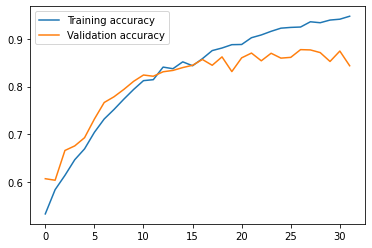

In [151]:
plt.plot(history.history['accuracy'], label='Training accuracy')

plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()

In [168]:
preds = model.predict(Xtest, verbose=0)
testpreds = []
length = np.arange(0,2000)
preds[0,0]
for x in length:
    if preds[x,0] > preds[x,1]:
        testpreds.append(False)
    else:
        testpreds.append(True)

print("Recall:",recall_score(ytest,testpreds))
print("Precision:", precision_score(ytest,testpreds))

Recall: 0.937
Precision: 0.7920540997464074
